## 本章内容介绍

本章将介绍线性回归，进行python3.6的实现。在这之后引入了局部平滑技术，分析如何更加的拟合数据。接下来本章将探讨回归在“欠拟合”的情况下的缩减(shrinkage)技术，探讨偏差和方差的概念。最后，我们将融合所有技术，预测鲍鱼的年龄介绍和玩具的售价。此外为了获取一些玩具的数据，我们还将使用python来做一些采集的工作。这一章的内容会十分丰富。

##  用线性回归找到最佳拟合曲线

回归的目的预测数值型的目标值，最直接的方法是依据输入写一个目标值的计算公式。假如你想要预测姐姐男友汽车的功率大小，可能会这样算：

$$HorsePower=0.0015*annualSalary-0.99*horseListeningToPublicRadio$$

这就是所谓的回归方程(regression equation)，其中的0.0015和-0.99称为回归系数(regression weights)，求这些回归系数的过程就是回归。一旦有了这些回归系数，再给定输入，做预测就非常容易了。具体的做法是用回归系数乘以输入值，在将结果全部加在一起，就得到了预测值。

应当怎样从一大堆的数据求出回归方程呢？假定输入数据存放在矩阵**X**中，而回归系数存放在向量w中。那么对于给定的数据$x_1$，预测结果将会通过$Y_1=X^T_1w$给出。现在的问题是，手里有一些x和对应的y，怎样才能找到w呢？一个常用的方法就是找出误差最小的w。这里的误差是指预测y值和真实y值之间的差值，使用该误差的简单累加将使得正差值和负差值相互抵消，所以我们采用评查误差。

平方误差可以写做：

$$\sum_{i=1}^m(y_i-x^T_iw)^2  \rightarrow (8.1)$$  

用矩阵表示还可以写做$(y-Xw)^T(y-Xw)$。如果对w求导，得到$X^T(y-Xw)$，令其等于零，解出w如下：

$$\frac{\partial (y-Xw)(y-Xw)^T}{\partial w}$$

$$= \frac{\partial(y-Xw) (y^T- X^Tw^T)}{\partial w}$$

$$\frac{\partial y^Ty -y^TXw-w^TX^Ty+w^TX^TXw}{\partial w}$$

$$=-2X^T(y-Xw)$$

令其等于0

$$\frac{\partial (y-Xw)(y-Xw)^T}{\partial w}=0$$

$$-2X^T(y-Xw) =0$$

$$X^T(y-Xw)=0$$

$$X^Ty -X^TXw=0$$

当$$|X^TX| \neq 0$$:

$$w=(X^TX)^{-1}X^Ty  \rightarrow (8.2)$$

w上方的小标记表示，这是当前可以估计的w的最优解。从现有数据上估计的w可能并不是数据中的真实的w值，所以使用了一个“帽”符号来表示它仅使w的一个最佳估计

接下来介绍如何给出该数据的最佳拟合直线

### 导入所需要的包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import seaborn as sns
#显示中文，否则为小方框
plt.rcParams['font.sans-serif'] = ['simhei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

large = 22; med = 16; small = 12
            # 设置子图上的标题字体
params = {'axes.titlesize': large,  
            # 设置图例的字体
          'legend.fontsize': med,
            # 设置图像的画布
          'figure.figsize': (16, 10),  
            # 设置标签的字体
          'axes.labelsize': med, 
            # 设置x轴上的标尺的字体
          'xtick.labelsize': med,  
            # 设置整个画布的标题字体
          'ytick.labelsize': med,  
          'figure.titlesize': large}  
# 更新默认属性
plt.rcParams.update(params)  
 # 设定整体风格
plt.style.use('seaborn-whitegrid')
# 设定整体背景风格
sns.set_style("white")

### 数据导入

In [2]:
def loadDateSet(fileName):
    '''
    函数功能：
        将每行的前len-1列和最后一列的数据转换为矩阵
    参数：
        fileName__文件名
    返回值：
        特征矩阵，标签矩阵
    '''
    # 获取特征个数
    numFeat = len(open(fileName).readline().split('\t')) -1 
    # 创建空列表dataMat
    dataMat = []   
    # 创建空列表labelMat
    labelMat = []
    # 打开文件，得到文件句柄并赋值给一个变量
    fr = open(fileName)
    # 遍历每一行数据
    for line in fr.readlines():
        # 创建空列表lineArr
        lineArr = []
        # strip() 方法用于移除字符串头尾指定的字符（空格）
        # split() 通过指定分隔符对字符串进行切片（换行符）
        curLine = line.strip().split('\t')
        # 对每一行数据进行数据处理
        for i in range(numFeat):
            # 将n-1个特征组成一个list
            lineArr.append(float(curLine[i]))
        # 双list形成矩阵
        dataMat.append(lineArr)
        # 将最后一个数值作为目标值
        labelMat.append(float(curLine[-1]))
    # 返回特征矩阵，标签矩阵
    return dataMat, labelMat

# 测试函数
loadDateSet("ex0.txt")

([[1.0, 0.067732],
  [1.0, 0.42781],
  [1.0, 0.995731],
  [1.0, 0.738336],
  [1.0, 0.981083],
  [1.0, 0.526171],
  [1.0, 0.378887],
  [1.0, 0.033859],
  [1.0, 0.132791],
  [1.0, 0.138306],
  [1.0, 0.247809],
  [1.0, 0.64827],
  [1.0, 0.731209],
  [1.0, 0.236833],
  [1.0, 0.969788],
  [1.0, 0.607492],
  [1.0, 0.358622],
  [1.0, 0.147846],
  [1.0, 0.63782],
  [1.0, 0.230372],
  [1.0, 0.070237],
  [1.0, 0.067154],
  [1.0, 0.925577],
  [1.0, 0.717733],
  [1.0, 0.015371],
  [1.0, 0.33507],
  [1.0, 0.040486],
  [1.0, 0.212575],
  [1.0, 0.617218],
  [1.0, 0.541196],
  [1.0, 0.045353],
  [1.0, 0.126762],
  [1.0, 0.556486],
  [1.0, 0.901144],
  [1.0, 0.958476],
  [1.0, 0.274561],
  [1.0, 0.394396],
  [1.0, 0.87248],
  [1.0, 0.409932],
  [1.0, 0.908969],
  [1.0, 0.166819],
  [1.0, 0.665016],
  [1.0, 0.263727],
  [1.0, 0.231214],
  [1.0, 0.552928],
  [1.0, 0.047744],
  [1.0, 0.365746],
  [1.0, 0.495002],
  [1.0, 0.493466],
  [1.0, 0.792101],
  [1.0, 0.76966],
  [1.0, 0.251821],
  [1.0, 0.181951],

In [3]:
# 导入数据
ex0 = pd.read_table('ex0.txt', header = None)
# 显示前五行数据
ex0.head() 

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


,0,1,2
0,1.0,0.067732,3.176513
1,1.0,0.427810,3.816464
2,1.0,0.995731,4.550095
3,1.0,0.738336,4.256571
4,1.0,0.981083,4.560815


In [4]:
# 查看数据信息（无缺失值）
ex0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
0    200 non-null float64
1    200 non-null float64
2    200 non-null float64
dtypes: float64(3)
memory usage: 4.8 KB


In [6]:
# 查看数据统计信息
ex0.describe()

,0,1,2
count,200.0,200.000000,200.000000
mean,1.0,0.488319,3.835601
std,0.0,0.292943,0.503443
min,1.0,0.014855,3.078132
25%,1.0,0.234368,3.452775
50%,1.0,0.466573,3.839350
75%,1.0,0.730712,4.247613
max,1.0,0.995731,4.692514


In [7]:
# 使用pandas获取特征矩阵，标签矩阵
def get_Mat(dataSet):
    '''
    函数功能：
        获取特征矩阵和标签矩阵
    参数：
        dataSet__数据集
    返回值：
        特征矩阵，标签矩阵
    '''
    # iloc__位置索引，不包括-1
    # np.mat__生成矩阵xMat
    # Dataframe.values__获取Dataframe元素
    xMat = np.mat(dataSet.iloc[:, :-1].values)
    # iloc__位置索引，-1
    # np.mat__生成矩阵yMat
    # Dataframe.values__获取Dataframe元素
    yMat = np.mat(dataSet.iloc[:,-1].values).T
    # 返回矩阵xMat, yMat
    return xMat, yMat

# 函数测试
get_Mat(ex0)

(matrix([[1.      , 0.067732],
         [1.      , 0.42781 ],
         [1.      , 0.995731],
         [1.      , 0.738336],
         [1.      , 0.981083],
         [1.      , 0.526171],
         [1.      , 0.378887],
         [1.      , 0.033859],
         [1.      , 0.132791],
         [1.      , 0.138306],
         [1.      , 0.247809],
         [1.      , 0.64827 ],
         [1.      , 0.731209],
         [1.      , 0.236833],
         [1.      , 0.969788],
         [1.      , 0.607492],
         [1.      , 0.358622],
         [1.      , 0.147846],
         [1.      , 0.63782 ],
         [1.      , 0.230372],
         [1.      , 0.070237],
         [1.      , 0.067154],
         [1.      , 0.925577],
         [1.      , 0.717733],
         [1.      , 0.015371],
         [1.      , 0.33507 ],
         [1.      , 0.040486],
         [1.      , 0.212575],
         [1.      , 0.617218],
         [1.      , 0.541196],
         [1.      , 0.045353],
         [1.      , 0.126762],
        

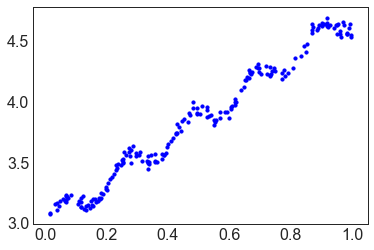

In [8]:
def plotDataSet(dataSet):
    '''
    函数功能：
        数据可视化
    参数：
        dataSet__数据集
    return:
        可视化结果(散点图)
    '''
    # dataSet通过get_Mat函数得到矩阵xMat, yMat
    xMat, yMat = get_Mat(dataSet)
    # plt.scatter__散点图
    plt.scatter(xMat.A[:,-1], yMat.A, c='b', s=10)
    # 显示图像
    plt.show()

# 函数测试
plotDataSet(ex0)

### 计算回归系数

$$\hat{w}=(X^TX)^{-1}X^TY  \rightarrow (8.3)$$

上述公式中包含$(X^TX)^{-1}$，也就是需要对矩阵求逆，因此这个方程只在逆矩阵的时候适用。然而，矩阵的逆可能并不存在，因此必须要在代码中对此作出判断

In [9]:
def standRegres(dataSet):
    '''
    函数功能：
        计算回归系数ws
    参数：
        dataSet__数据集
    返回值：
        ws__回归系数
     '''
    # 根据get_Mat函数返回xMat, yMat
    xMat, yMat = get_Mat(dataSet)
    # 根据公式(1.3)计算可逆部分
    xTx = xMat.T * xMat
    # 调用linalg.de()来计算行列式，行列式不能为0
    if np.linalg.det(xTx) == 0:
        # 若行列式等于0，则打印"This matrix is singular, cannot do inverse"
        print("This matrix is singular, cannot do inverse")
    # 根据公式(1.3)计算回归系数
    ws = xTx.I * (xMat.T * yMat)
    # 返回回归系数ws
    return ws

#函数测试
standRegres(ex0)

matrix([[3.00774324],
        [1.69532264]])

该函数首先读入x和y并将它们保存在矩阵中；然后计算$X^TX$，然后判断它的行列式是否为零，如果行列式为零，那么计算逆矩阵将会错误

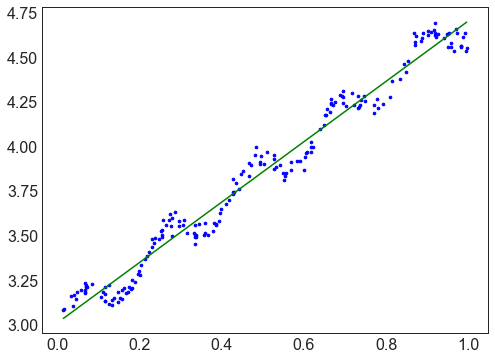

In [10]:
def plotReg(dataSet):
    '''
    函数功能：
        描绘数据集图像以及预测图像
    参数:
        dataSet__数据集
    返回值
    '''
    # 根据get_Mat函数返回xMat, yMat
    xMat, yMat = get_Mat(dataSet)
    # 创建画布
    fig = plt.figure(figsize=(8,6))
    # 111，表示为将图像分为1行1列，此子图占据从左到右从上到下的1位置
    # 234，表示为将图像分为2行3列，取从左到右，从上到下第4个位置
    ax = fig.add_subplot(111)
    # 使用scatter描绘数据图像（散点图）
    ax.scatter(xMat.A[:,-1], yMat.A, c='b', s=7)
    # 拷贝数据（浅拷贝）
    xCopy = xMat.copy()
    # 如果直线上的数据点次序混乱，绘图时将会出现问题，所以首先要将点按照升序排列
    xCopy.sort(0)
    # 根据standRegres函数返回回归系数
    ws = standRegres(dataSet)
    # 根据回归系数以及特征矩阵得到预测值
    yHat = xCopy * ws
    # 描绘预测函数图像
    ax.plot(xCopy[:,1], yHat, c="g")
    # 显示图像
    plt.show()
    
# 函数测试
plotReg(ex0)

### 计算相关系数

相关系数：通过命令corrcoef(yEstimate, yActual)来计算预测值与真实值之间的相关性

In [11]:
# 根据get_Mat函数返回xMat, yMat
xMat,yMat = get_Mat(ex0)
# 计算回归系数ws
ws = standRegres(ex0)
# 计算预测值yHat
yHat = xMat * ws
# 计算相关系数(需要将yMat转置，以保证两个向量都是为行向量)
np.corrcoef(yHat.T, yMat.T)
# yMat和自己的匹配最完美，对角线上的数据为1.0。而yHat和yMat的相关系数为0.98

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

In [12]:
# 导入R^2评估指标
from sklearn.metrics import r2_score
r2_score(yHat,yMat)

0.9723881613378995

最佳拟合直线的方法将数据视为直线进行建模，R^2有0.97，相关系数为0.98。看起来是一个不错的表现，但是我们发现数据呈现有规律的波动，我们拟合出来的直线没有很好的拟合这些波动的数据。

## 局部线性加权

线性回归的一个问题就是可能出现欠拟合的现象，因为它求的是具有最小均方误差的无偏估计，显然易见，如果模型欠拟合将不能取得最好的预测结果。所以有些方法允许在估计中引入一些偏差，从而降低预测的均方误差。

其中的一个方法是局部加权线性回归，在该算法中，我们给待测点附近的每个点赋予一定的权重，在这个子集上基于最小均方误差来进行普通的回归。与KNN一样，这种算法每次预测均需要事先选取出对应的数据子集。该算法的回归系数w的形式为：

$$\hat{w}=(X^TWX)^{-1}X^TWy \rightarrow (8.4)$$

其中w是一个矩阵，用来給每个数据点赋予权重

lwlr使用“核”来对附近的点赋予最高的权重，最常用的就是高斯核

$$w(i,i)=exp(\frac{|x^i-x|^2}{-2k^2}) \rightarrow (8.5) $$

这样就构建了一个只含对角元素的权重矩阵w，并且点x与x(i)越近，w(i,i)将会越大。上述公式包含一个需要用户指定的参数k，它决定了对附近的点赋予多大的权重

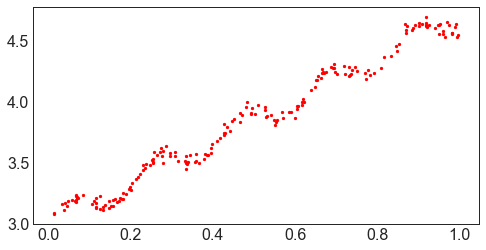

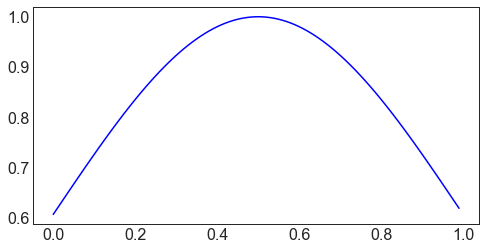

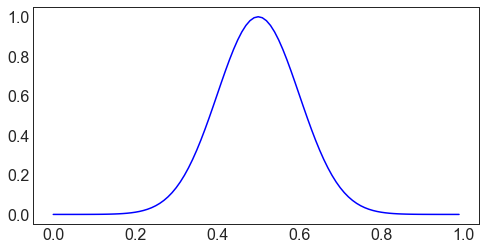

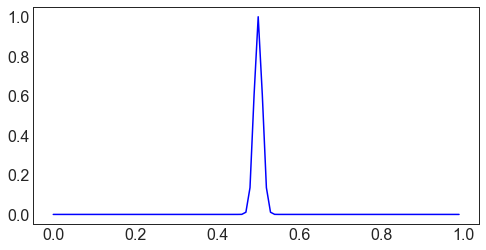

In [13]:
# 根据函数get_Mat返回特征矩阵和标签矩阵
xMat, yMat = get_Mat(ex0)
# 假定我们正要预测的点是x=0.5
x = 0.5
# 横坐标上所有点
xi = np.arange(0, 1.0, 0.01)
# k的取值
k1, k2, k3 = 0.5, 0.1, 0.01
# 高斯核w1
w1 = np.exp((xi - x)**2 / (-2 * k1 **2))
# 高斯核w2
w2 = np.exp((xi - x)**2 / (-2 * k2 **2))
# 高斯核w3
w3 = np.exp((xi - x)**2 / (-2 * k3 **2))
# 创建画布，设定画布大小(8,4)
fig = plt.figure(figsize=(8,4))
# plt.scatter__散点图
plt.scatter(xMat.A[:,1], yMat.A ,c='r', s=5)
# 创建列表w
w = [w1, w2, w3]
# 遍历w中的元素(w1, w2, w3)
for i in w:
    # 创建画布，设定画布大小(8,4) 
    plt.figure(figsize=(8,4))
    plt.plot(xi,i,c='b')
    # 显示图像
    plt.show()

### 局部加权线性回归函数

$$w(i,i)=exp(\frac{|x^i-x|^2}{-2k^2}) \rightarrow (8,6)$$

$$\hat{w}=(X^TWX)^{-1}X^TWy \rightarrow (8.7)$$

In [14]:
def lwlr(testPoint, xMat, yMat, k=1.0):
    '''
    函数功能：
        给定x空间中的任意一点，计算出对应的预测值yHat
    参数：
    
    返回值：
        预测值
    '''
    # 获取testPoint索引长度
    n = testPoint.shape[0]
    # 获取xMat索引长度
    m = xMat.shape[0]
    # 构建对角矩阵w(对角线全为1，其他全为0)，阶数等于样本点个数
    weights = np.mat(np.eye(m))
    # 初始化yHat
    yHat = np.zeros(n)
    # 遍历索引n
    for i in range(n):
        # 遍历训练训练数据集(xMat)，每一个样本点对应的权重
        for j in range(m):
            # 高斯核公式
            diffMat = testPoint[i] -xMat[j]
            weights[j,j] = np.exp(diffMat * diffMat.T / (-2 * k**2))
        xTx = xMat.T * (weights * xMat)
        # 判断行列式是否为0
        if np.linalg.det(xTx) == 0:
            # 若行列式为0，打印 "This matrix is singular, cannot not inverse"
            print("This matrix is singular, cannot not inverse")
            # 程序运行到所遇到的第一个return即返回（退出def块）
            return
        # 计算回归系数
        ws = xTx.I * (xMat.T * (weights * yMat))
        # 计算testPoint对应的y值
        yHat[i] = testPoint[i] * ws
    # 返回回归系数与预测值
    return ws , yHat

In [15]:
# 根据get_Mat函数得到xMat,yMat
xMat, yMat = get_Mat(ex0)
# 对数据进行排序(默认为升序)，并且返回索引
srtInd = xMat[:,1].argsort(0)
# 使用索引取出数据
# xMat[srtInd]
# 返回排序后的xMat，用xSort保存变量
xSort = xMat[srtInd][:,0]

In [16]:
# k=1.0，返回回归系数以及预测值
ws_1, yHat_1 = lwlr(xMat, xMat, yMat, k=1.0)
# k=0.01，返回回归系数以及预测值
ws_2, yHat_2 = lwlr(xMat, xMat, yMat, k=0.01)
# k=0.003，返回回归系数以及预测值
ws_3, yHat_3 = lwlr(xMat, xMat, yMat, k=0.003)

Text(0.5, 1.0, 'k=0.003')

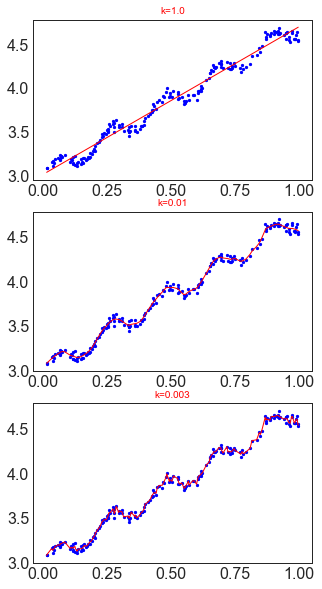

In [17]:
fig = plt.figure(figsize = (5, 10))
ax1 = fig.add_subplot(311)
ax1.scatter(xMat[:,-1].A, yMat.A, c='b',s=5)
ax1.plot(xSort[:,1], yHat_1[srtInd], linewidth =1 ,color = 'r')
plt.title('k=1.0', size = 10, color = 'r')

ax2 = fig.add_subplot(312)
ax2.scatter(xMat[:,-1].A, yMat.A, c='b',s=5)
ax2.plot(xSort[:,1], yHat_2[srtInd], linewidth =1 ,color = 'r')
plt.title('k=0.01', size = 10, color = 'r')

ax3 = fig.add_subplot(313)
ax3.scatter(xMat[:,-1].A, yMat.A, c='b',s=5)
ax3.plot(xSort[:,1], yHat_3[srtInd], linewidth =1 ,color = 'r')
plt.title('k=0.003', size = 10, color = 'r')

上述图给出了k在三种不同取值的取值情况下的结果图，当k=1.0时权重很大，如同将所有的数据视为等权重，得出的最佳拟合直线与标准的回归一致。使用k=0.01得到了非常好的结果，抓抓了数据的潜在模型。使用k=0.003纳入了太多的噪声点，拟合的直线与数据点过于贴近，进而导致了过拟合现象。

## 预测鲍鱼的年龄

接下来，我们将回归用于真实数据。有一份来自UCI数据集合的数据，记录了鲍鱼(一种介壳类水生动物)的年龄。鲍鱼年龄可以从鲍鱼壳的层数推算得到。

### 导入数据

In [29]:
abalone = pd.read_table("abalone.txt", header = None)
# 加入列名
abalone.columns= ['性别',"长度","直径","高度","整体重量","肉重量","内脏重量","壳重","年龄"]
abalone.head()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,性别,长度,直径,高度,整体重量,肉重量,内脏重量,壳重,年龄
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [30]:
# 查看数据信息
abalone.info() # 无缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
性别      4177 non-null int64
长度      4177 non-null float64
直径      4177 non-null float64
高度      4177 non-null float64
整体重量    4177 non-null float64
肉重量     4177 non-null float64
内脏重量    4177 non-null float64
壳重      4177 non-null float64
年龄      4177 non-null int64
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [31]:
# 查看统计信息
abalone.describe()

,性别,长度,直径,高度,整体重量,肉重量,内脏重量,壳重,年龄
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,-1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,-1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,1.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [32]:
def randSplitDate(dataSet, rate):
    '''
    函数功能：
        将输入的数据集随机切分为训练集和测试集
    参数：
        dataSet__数据集
        rate__切分比率
    '''
    # 'Int64Index'转换为list 
    l = list(dataSet.index)
    # 设置随机种子
    random.seed(1)
    # 随机打乱数据
    random.shuffle(l)
    # 随机后的index赋值给dataSet.index
    dataSet.index = l
    # m为原先dataSet的数目
    m = dataSet.shape[0]
    # n为按照rate比率后的数目
    n = int(m * rate)
    
    # 重新分配训练集
    train = dataSet.iloc[range(n),:]
    # 重新分配的测试集
    test = dataSet.iloc[range(n,m),:]
    return train ,test
# 函数测试
train, test = randSplitDate(abalone, 0.8)
train.head()

,性别,长度,直径,高度,整体重量,肉重量,内脏重量,壳重,年龄
1589,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
2273,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
103,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
4076,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
2557,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [33]:
# 将索引进行恢复
for i in [train, test]:
    i.index = range(i.shape[0])
train.head()

,性别,长度,直径,高度,整体重量,肉重量,内脏重量,壳重,年龄
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [34]:
# 使用Sklearn进行数据划分
from sklearn.model_selection import train_test_split
X = abalone.iloc[:,:-1]
y = abalone.iloc[:,-1]
X_train, Ytrain, Xtest, Ytest = train_test_split(X, y, test_size=0.3, shuffle =True, random_state=42)

### RSS__残差平方和

$$RSS=||y-Xw||_2^2$$

In [126]:
def rssError(dataSet, standRegre):
    '''
    函数功能：
        计算评估指标RSS(Sklearn中使用MSE代替RSS)
    参数：
        dataSet__数据集
        standRegre__回归系数的函数
    返回值：
        评估指标RSS
    '''
    ws = standRegre(dataSet)
    xMat, yMat = get_Mat(dataSet)
    yHat = xMat * ws 
    rss = ((yMat.A.flatten() - yHat.A.flatten())**2).sum()
    return rss

In [127]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yMat.A.flatten(), yHat.A.flatten())

0.00677624540840745

In [141]:
rssError(ex0, standRegres)

1.3552490816814906

In [142]:
Xtrain, ytrain = get_Mat(train)
Xtest, ytest = get_Mat(test)
ws_1, yHat_1 = lwlr(Xtrain[:99], Xtrain[:99], ytrain[:99], k=0.1)

In [143]:
def ssePlot(train,test):
    X0,Y0 = get_Mat(train)
    X1,Y1 =get_Mat(test)
    train_sse = []
    test_sse = []
    for k in np.arange(0.2,10,0.5):
        ws1,yHat1 = lwlr(X0[:99],X0[:99],Y0[:99],k)
        sse1 = ((Y0[:99].A.T - yHat1)**2).sum()
        train_sse.append(sse1)
        
        ws2,yHat2 = lwlr(X1[:99],X0[:99],Y0[:99],k)
        sse2 = ((Y1[:99].A.T - yHat2)**2).sum()
        test_sse.append(sse2)
        
    plt.plot(np.arange(0.2,10,0.5),train_sse,color='b')
    plt.plot(np.arange(0.2,10,0.5),test_sse,color='r')
    plt.xlabel('不同k取值')
    plt.ylabel('SSE')
    plt.legend(['train_sse','test_sse'])

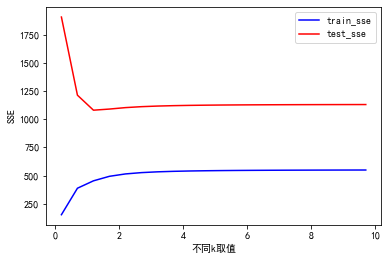

In [144]:
ssePlot(train,test)

## 8.4缩减系数来“理解”数据

$$\hat{w}=(X^TX+\lambda I)^{-1}X^Ty$$

In [24]:
def ridgeRegres(xMat, yMat, lam=0.2):
    '''
    函数功能：
    '''
    xTx = xMat.T * xMat
    denom = xTx + np.eye(xMat.shape[1]) * lam
    if np.linalg.det == 0:
        print("This matrix is singular, cannot to inverse")
        return
    ws = denom.I * (xMat.T * yMat)
    return ws

In [37]:
def ridgeTest(dataSet, k=30): # k_lambda的个数
    xMat, yMat = get_Mat(dataSet)
    m, n = xMat.shape
    wMat = np.zeros((k,n))  # 用来乘放结果，初始化矩阵
    
    # 特征标准化：减去均值并除以方差
    yMean = yHat.mean(0) # 0的意思是对求均值，不写0就是对所有的数据求均值
    xMean = xMat.mean(0)
    xVar = xMat.var(0)
    yMat = yMat-yMean
    xMat = (xMat - xMean)/xVar
    
    for i in range(k):
        xTx = xMat.T * xMat
        lam = np.exp(i-10)
        denom = xTx +np.eye(n) * lam
        ws = denom.I * (xMat.T * yMat)
        wMat[i,:]=ws.T
    return wMat

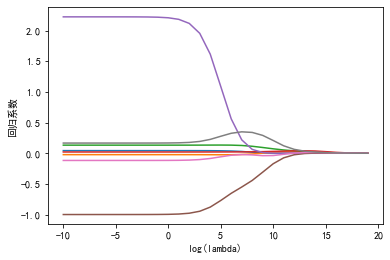

In [39]:
wMat = ridgeTest(abalone, k=30)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(-10, 20, 1), wMat)
plt.xlabel("log(lambda)")
plt.ylabel("回归系数")
plt.show()

## 前向逐步回归

In [41]:
xMat.mean(0)

array([ 0.02551732, -0.01040337,  0.09402472,  0.0220048 ,  1.14254594,
       -0.59219145, -0.06308021,  0.15483572])

In [42]:
def regularize(xMat,yMat):
    '''
    函数功能：数据标准化
    参数：
        xMat__特征矩阵
        yMat__标签矩阵
    '''
    inxMat = xMat.copy()  # 数据拷贝
    inyMat = yMat.copy()
    # 每一列求一个均值
    yMean = yMat.mean(0)
    # 数据减去均值
    inyMat = inyMat - yMean 
    # 每一列求一个均值
    xMeans = inxMat.mean(0)  
    # 求取方差
    xVar = inxMat.var(0)    
    # 所有的特征都减去各自的均值并除以方差
    inxMat = (inxMat - xMeans) / xVar  
    # 返回特征矩阵，标签矩阵
    return inxMat, inyMat

In [49]:
def rssError(yMat, yHat):
    rssE = ((yMat.A - yHat.A)**2).sum()
    return rssE

In [62]:
def stageWise(dataSet, eps=0.01, numIt=100):
    '''
    函数功能：前向逐步回归
    参数：
        dataSet__数据集
        eps__每次迭代需要调整的步长
        numIt__迭代次数
    '''
    # 没有进行标准化的特征矩阵和标签矩阵
    tem_xMat, tem_yMat = get_Mat(dataSet)
    # 标准化后的特征矩阵和特征标签
    xMat, yMat = regularize(tem_xMat, tem_yMat)
    m, n = xMat.shape
    # 初始化numIt次迭代的回归系数
    wsMat = np.zeros((numIt, n))
    # 初始化回归系数矩阵
    ws = np.zeros((n,1))
    
    wsTest = ws.copy()
    wsMax = ws.copy()
    # 迭代numIt次
    for i in range(numIt):
        # 每次迭代时都打印出w向量
        #print(ws.T)
        # 设置当前最小误差lowestError为正无穷
        lowestError = np.inf
        # 遍历每一个特征的回归系数
        for j in range(n):
            for sign in [-1, 1]:
                wsTest = ws.copy()
                # 微调回归系数
                wsTest[j] += eps * sign
                # 计算预测值yHat
                yHat = xMat * wsTest
                # 计算误差
                rssE = rssError(yMat, yHat)
                # 如果误差error小于当前最小的lowestError：设置wbest等于当前的w
                if rssE < lowestError:
                    lowestError == rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        wsMat[i,:] = ws.T
    # 返回回归系数矩阵
    return wsMat  

In [4]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import seaborn as sns

In [5]:
print(mpl.__version__)
print(sns.__version__)
print(np.__version__)
print(pd.__version__)

3.1.0
0.9.0
1.16.4
0.24.2


In [63]:
stageWise(abalone, eps=0.01, numIt=200)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.01],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.02],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.03],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.98],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.99],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 2.  ]])